In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('recent_grades.csv')

# Analyse exploratoire

## Répartition des majors

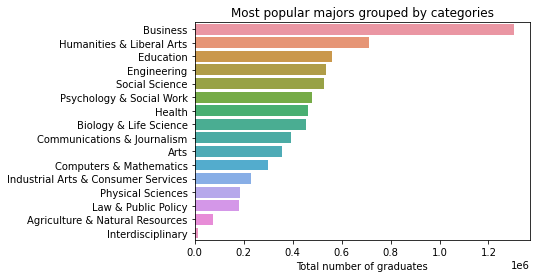

In [28]:
ordered_total = df.groupby('Major_category').sum().sort_values('Total', ascending=False)
sns.barplot(x=ordered_total.Total, y=ordered_total.index)
plt.xlabel('Total number of graduates')
plt.ylabel('')
plt.title('Most popular majors grouped by categories')
plt.show()
# Attention, cela entraîne un effet taille sur certaines variables.

In [30]:
most_common_category = df.groupby('Major_category')['Total'].sum().sort_values(ascending=False).reset_index()
most_common_category

Major_category      Total
0                              Business  1302376.0
1             Humanities & Liberal Arts   713468.0
2                             Education   559129.0
3                           Engineering   537583.0
4                        Social Science   529966.0
5              Psychology & Social Work   481007.0
6                                Health   463230.0
7                Biology & Life Science   453862.0
8           Communications & Journalism   392601.0
9                                  Arts   357130.0
10              Computers & Mathematics   299008.0
11  Industrial Arts & Consumer Services   229792.0
12                    Physical Sciences   185479.0
13                  Law & Public Policy   179107.0
14      Agriculture & Natural Resources    75620.0
15                    Interdisciplinary    12296.0

Text(0.5, 1.0, 'Most popular majors')

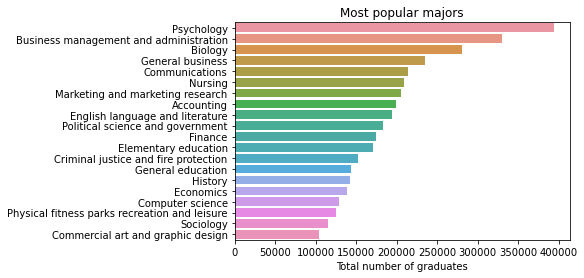

In [72]:
most_common_major = df.groupby('Major').sum().sort_values(by = 'Total', ascending=False).reset_index()
ax = sns.barplot(x="Total", y="Major", data = most_common_major.head(20))
ax.set_yticklabels([item.lower().capitalize() for item in most_common_major['Major'].head(20)])
plt.xlabel('Total number of graduates')
plt.ylabel('')
plt.title('Most popular majors')


## Analyse des salaires

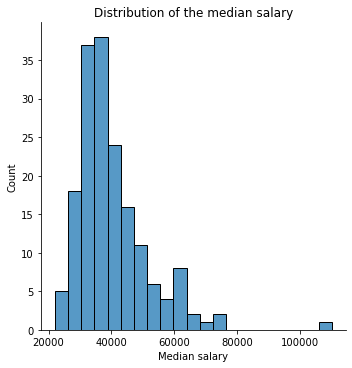

In [5]:
sns.displot(df.Median)
plt.xlabel('Median salary')
plt.title('Distribution of the median salary')
plt.show()

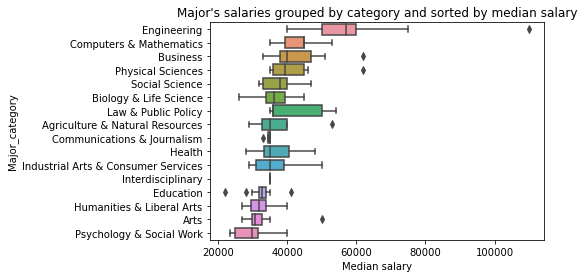

In [6]:
sorted_values = df.groupby('Major_category').median().sort_values(by='Median', ascending=False)
sns.boxplot(x=df.Median, y=df.Major_category, order=sorted_values.index)
plt.xlabel('Median salary')
plt.title("Major's salaries grouped by category and sorted by median salary")
plt.show()

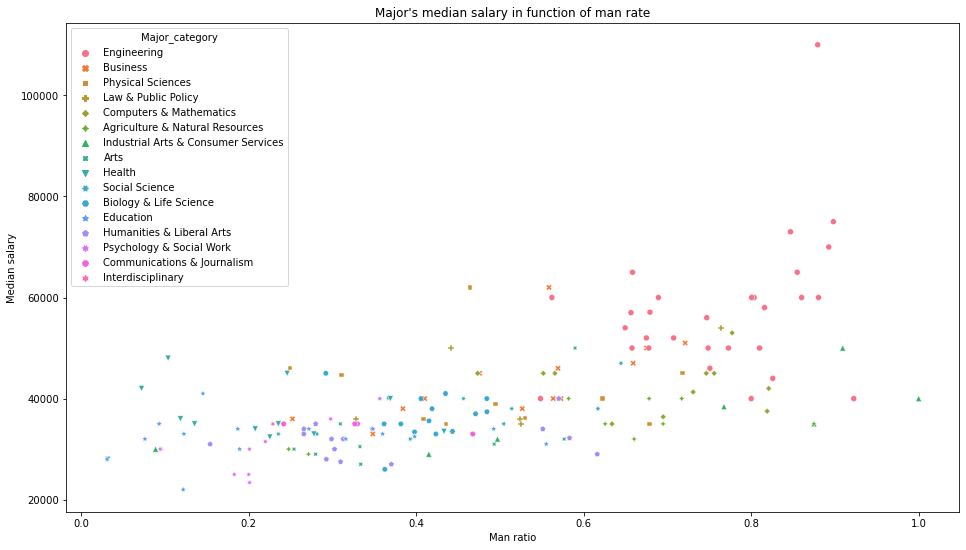

In [7]:
plt.figure(figsize=(16,9))
sns.scatterplot(x=1-df.ShareWomen, y=df.Median, hue=df.Major_category, style=df.Major_category)
plt.xlabel("Man ratio")
plt.ylabel("Median salary")
plt.title("Major's median salary in function of man rate")
plt.show()

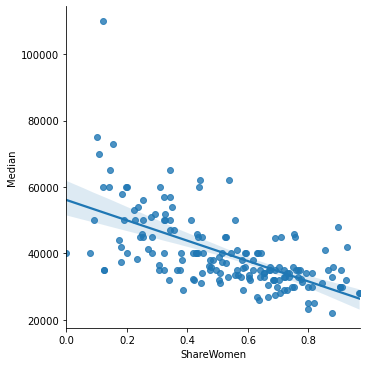

In [8]:
sns.lmplot(x="ShareWomen", y="Median", data=df)

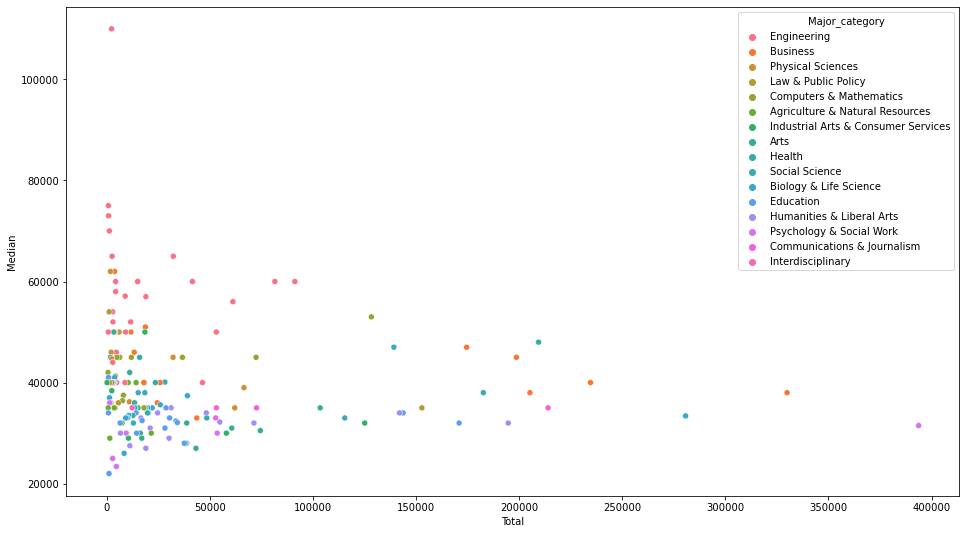

In [101]:
plt.figure(figsize=(16,9))
sns.scatterplot(x=df.Total, y=df.Median, hue=df.Major_category)
plt.title("Median salary explained by popularity of the major")
plt.show()

## Analyse de la proportion de femmes

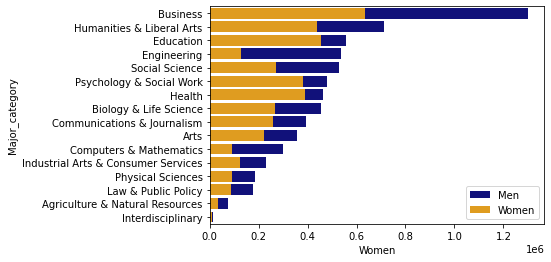

In [9]:
men_women_df = df.groupby('Major_category').sum().sort_values('Total', ascending=False)
b1 = sns.barplot(x=men_women_df.Total, y=men_women_df.index, color='darkblue', label="Men")
sns.barplot(x=men_women_df.Women, y= men_women_df.index, color='orange', label="Women")
b1.legend()

<AxesSubplot:xlabel='ShareWomen', ylabel='Major_category'>

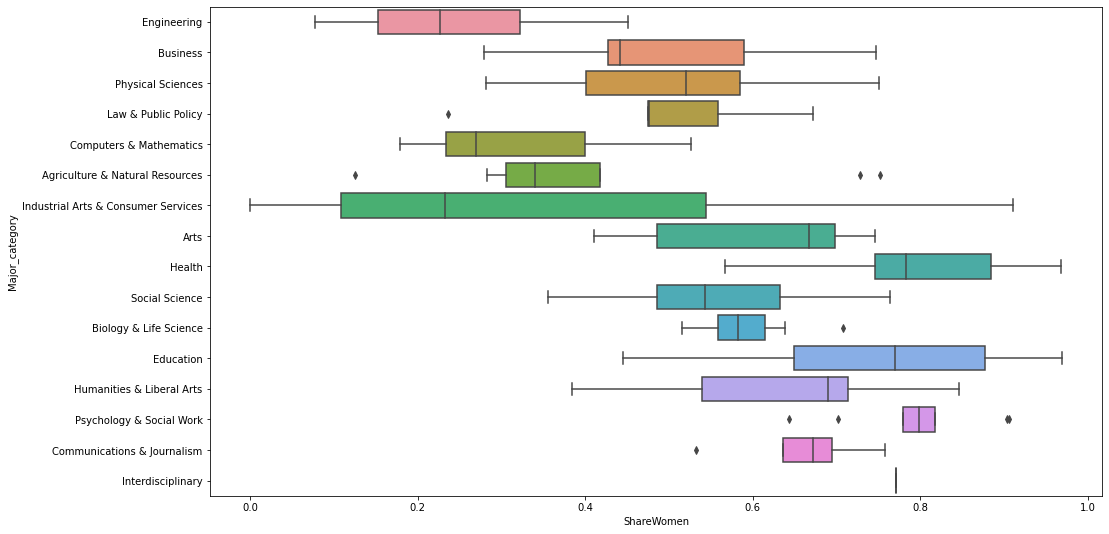

In [92]:
plt.figure(figsize=(16,9))
sns.boxplot(x=df.ShareWomen, y=df.Major_category)


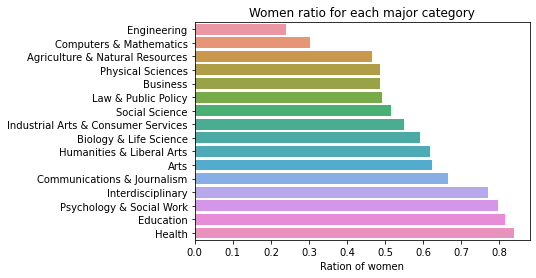

In [10]:
gender = df.groupby('Major_category').sum()
gender.ShareWomen = gender.Women/gender.Total
gender = gender.sort_values('ShareWomen')
sns.barplot(x=gender.ShareWomen, y=gender.index)
plt.xlabel("Ration of women")
plt.ylabel("")
plt.title("Women ratio for each major category")
plt.show()

## Taux de chomage

Text(0.5, 1.0, 'Top 20 major with unemployement rate')

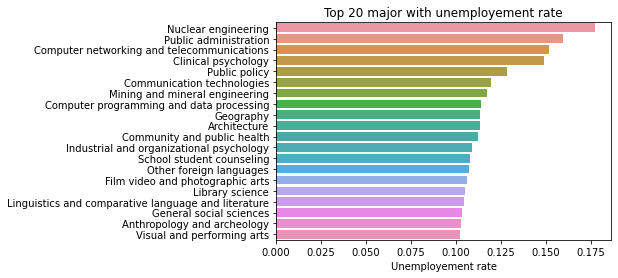

In [75]:
df_unemployed_ordered = df.sort_values('Unemployment_rate', ascending=False).head(20)
ax = sns.barplot(x=df_unemployed_ordered.Unemployment_rate, y=df_unemployed_ordered.Major)
ax.set_yticklabels([item.lower().capitalize() for item in df_unemployed_ordered['Major']])
plt.xlabel('Unemployement rate')
plt.ylabel('')
plt.title('Top 20 major with unemployement rate')

Text(0.5, 1.0, 'Top 20 major with unemployement rate')

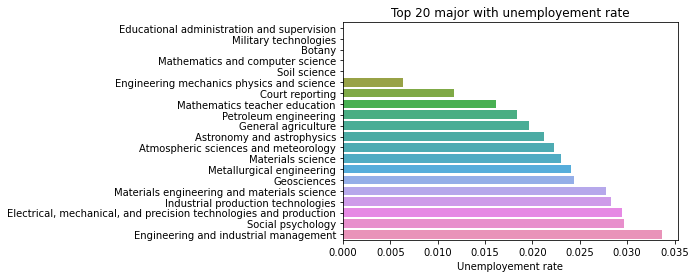

In [76]:
df_unemployed_ordered = df.sort_values('Unemployment_rate', ascending=True).head(20)
ax = sns.barplot(x=df_unemployed_ordered.Unemployment_rate, y=df_unemployed_ordered.Major)
ax.set_yticklabels([item.lower().capitalize() for item in df_unemployed_ordered['Major']])
plt.xlabel('Unemployement rate')
plt.ylabel('')
plt.title('Top 20 major with unemployement rate')

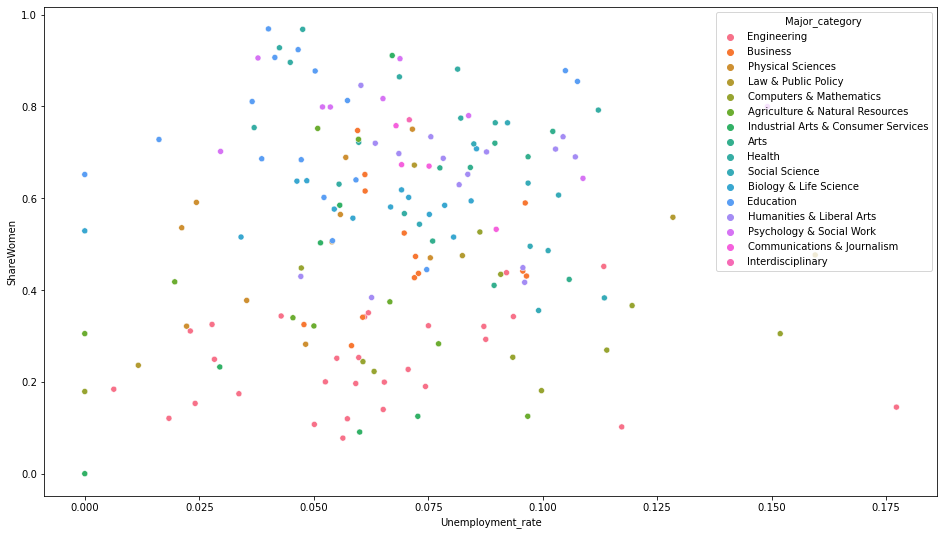

In [96]:
plt.figure(figsize=(16,9))
sns.scatterplot(x=df.Unemployment_rate, y=df.ShareWomen, hue=df.Major_category)
plt.show()

Le taux de chomage et la proportion de femme semble totalement décorrêlés.

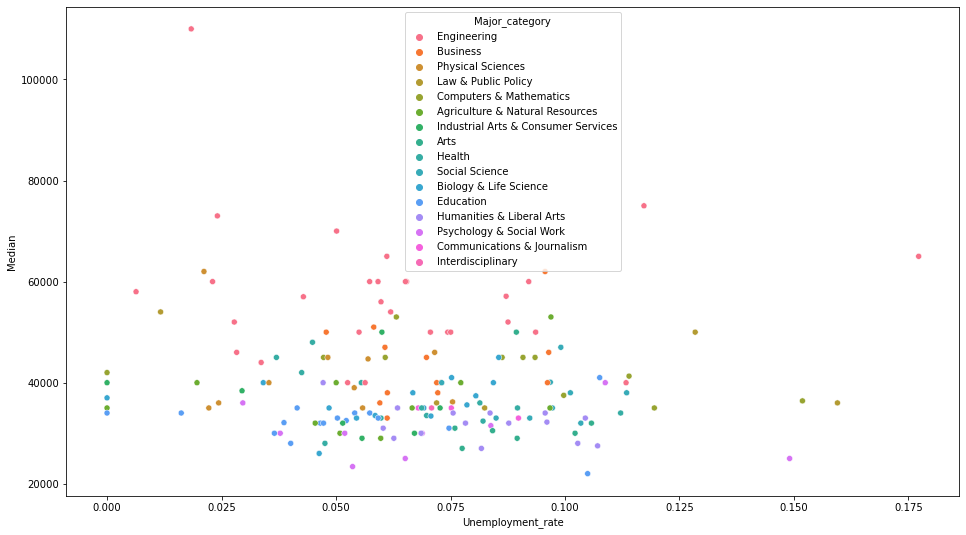

In [110]:
plt.figure(figsize=(16,9))
sns.scatterplot(x=df.Unemployment_rate, y=df.Median, hue=df.Major_category)
plt.show()

## Niveau de formation

In [117]:
(df.Employed / (df.College_jobs + df.Non_college_jobs))
low_wage_rate = df.Low_wage_jobs/df.Employed
non_college_rate = df.Non_college_jobs/df.Employed

Petites différences mais mineures (expliquées par les hypothèses de Pascal :) )

<AxesSubplot:ylabel='Major_category'>

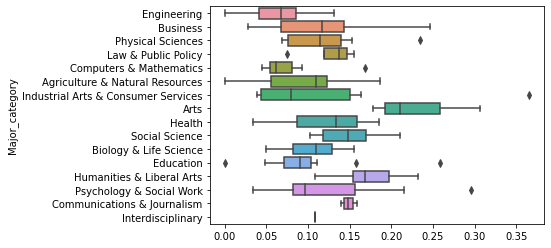

In [123]:
sns.boxplot(x=low_wage_rate, y=df.Major_category)

<AxesSubplot:ylabel='Major_category'>

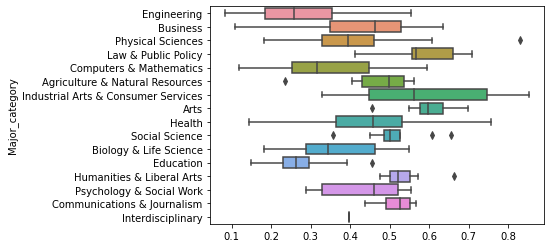

In [124]:
sns.boxplot(x=non_college_rate, y=df.Major_category)

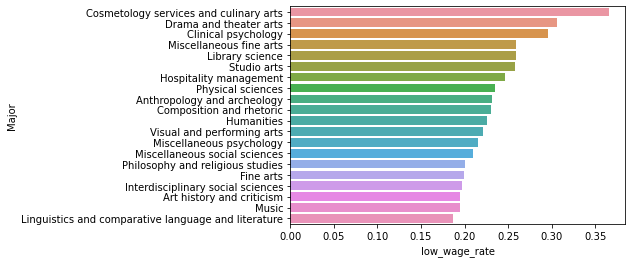

In [131]:
df['low_wage_rate'] = df.Low_wage_jobs/df.Employed
low_wage_ordered = df.sort_values('low_wage_rate', ascending=False).head(20)
ax = sns.barplot(x=low_wage_ordered.low_wage_rate, y=low_wage_ordered.Major)
ax.set_yticklabels([item.lower().capitalize() for item in low_wage_ordered['Major']])
df = df.drop(columns=['low_wage_rate'])

<AxesSubplot:xlabel='low_wage_ratio', ylabel='Major_category'>

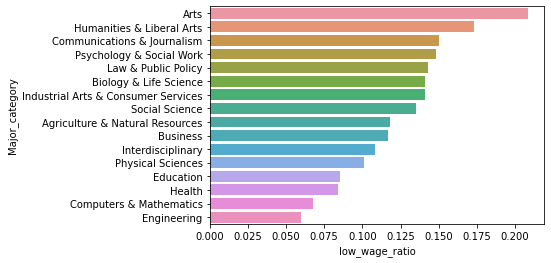

In [143]:
low_wage_grouped = df.groupby('Major_category').sum()
low_wage_grouped['low_wage_ratio'] = low_wage_grouped.Low_wage_jobs / low_wage_grouped.Employed
low_wage_grouped = low_wage_grouped.sort_values('low_wage_ratio', ascending=False)
sns.barplot(x=low_wage_grouped.low_wage_ratio, y=low_wage_grouped.index)

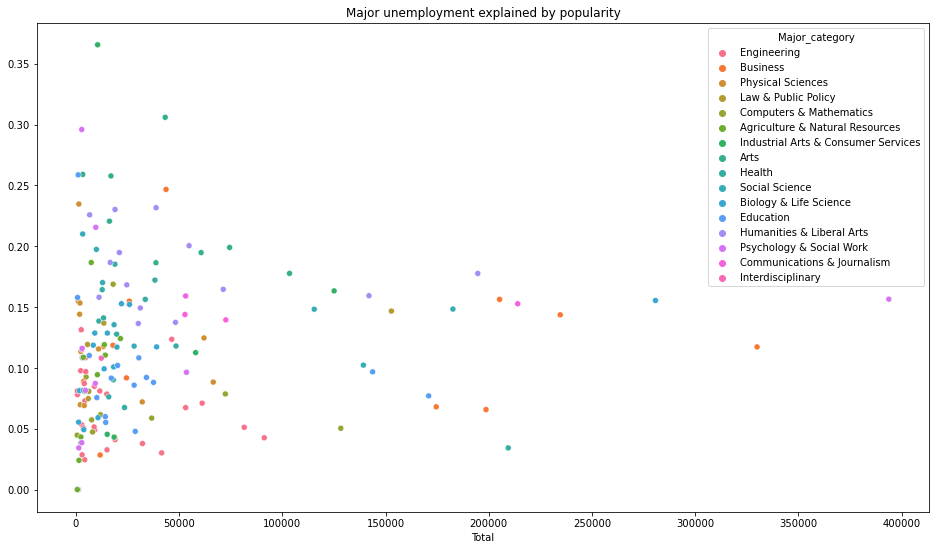

In [147]:
plt.figure(figsize=(16,9))
sns.scatterplot(x=df.Total, y=(df.Low_wage_jobs/df.Employed), hue=df.Major_category)
plt.title("Major unemployment explained by popularity")
plt.show()

# Traitement des données

## ACP

**Attention** : faire une ACP brutale ici n'a pas vraiment de sens.
- Les axes ne sont pas comparables (un déplacement de 1 sur les salaires ne correspond pas à un déplacement de 1 sur les effectifs) -> on peut centrer/réduire mais c'est bourrin
- Certains axes sont porteurs de la même info (Median P25TH 275TH)...

In [11]:
from sklearn.decomposition import PCA
df_num = pd.DataFrame(
    {
    "Rank": df.Rank,
    "Total": df.Total,
    "Men_rate": df.Men/df.Total,
    "Women_rate": df.ShareWomen,
    "Employed_rate": df.Employed/df.Total,
    "Full_time_rate": df.Full_time/df.Total,
    "Part_time_rate": df.Part_time/df.Total,
    "Full_time_year_round_rate": df.Full_time_year_round/df.Total,
    "Unemployed_rate": df.Unemployment_rate,
    "Median": df.Median,
    "P25th": df.P25th,
    "P75th": df.P75th,
    "College_jobs_rate": df.College_jobs/df.Total,
    "Non_college_jobs_rate": df.Non_college_jobs/df.Total,
    "Low_wage_jobs_rate": df.Low_wage_jobs/df.Total,
    }
)
df_num = df_num - df_num.mean()
df_num = df_num.div(df_num.std())
df_num

Rank     Total  Men_rate  Women_rate  Employed_rate  Full_time_rate  \
0   -1.717083 -0.583318  1.737242   -1.737242       0.607421        1.215489   
1   -1.697117 -0.608254  1.818177   -1.818177       0.626524        0.676136   
2   -1.677151 -0.606679  1.596791   -1.596791      -0.348004       -0.142611   
3   -1.657185 -0.600346  1.794555   -1.794555      -2.028947        1.795923   
4   -1.637219 -0.111999  0.781094   -0.781094       0.081378        0.507423   
..        ...       ...       ...         ...            ...             ...   
168  1.637219 -0.487703 -0.497697    0.497697      -0.486076       -0.653512   
169  1.657185 -0.575206 -1.275385    1.275385      -0.483383       -0.185291   
170  1.677151 -0.575458 -1.200821    1.200821      -0.529731       -0.577540   
171  1.697117 -0.547293 -1.196007    1.196007       0.299089        0.150574   
172  1.717083 -0.602867 -1.538620    1.538620      -1.232031       -1.237757   

     Part_time_rate  Full_time_year_round_rate  Unemployed_rate    Median  \
0         -1.377332                   0.149254        -1.642228  6.089577   
1          0.023687                   0.121750         1.617179  3.038187   
2         -0.866004                  -1.015971        -1.453778  2.863822   
3         -1.328645                   0.483095        -0.595614  2.602274   
4         -0.799476                   0.164388        -0.233858  2.166361   
..              ...                        ...              ...       ...   
168        0.479038                  -0.710494        -0.721064 -1.233759   
169       -0.289298                  -0.750047        -0.101502 -1.320942   
170        0.068010                  -0.443280         2.665838 -1.320942   
171       -0.184534                   0.892883        -0.480374 -1.460434   
172       -0.091800                  -1.249240         1.211795 -1.582490   

        P25th     P75th  College_jobs_rate  Non_college_jobs_rate  \
0    7.145813  4.931196           1.836562              -1.285275   
1    2.781861  2.583192           0.668859               0.090335   
2    2.236367  3.589479           1.091127              -0.912236   
3    1.472676  1.912334           0.411829              -1.841571   
4    2.236367  1.576905           1.302964              -1.419536   
..        ...       ...                ...                    ...   
168 -1.036596 -0.838185          -0.138993               0.168777   
169 -0.600201 -1.173614           1.022491              -0.838505   
170 -0.491102 -0.771099          -0.030622              -0.158877   
171 -1.123875 -1.710301           1.010878              -0.438162   
172 -1.036596 -1.978644          -0.546038              -0.149335   

     Low_wage_jobs_rate  
0             -0.143240  
1             -0.466865  
2             -1.773860  
3             -1.773860  
4             -1.178434  
..                  ...  
168           -0.027755  
169           -1.206073  
170            2.557295  
171           -0.458118  
172            1.681749  

[173 rows x 15 columns]

In [12]:
cls = PCA(n_components=15)
pcs = cls.fit_transform(df_num.dropna())
cls.explained_variance_ratio_

array([4.05233808e-01, 1.48099997e-01, 1.24916144e-01, 7.79662641e-02,
       6.97422184e-02, 4.97691406e-02, 4.37812803e-02, 3.05771217e-02,
       1.74381189e-02, 1.09624515e-02, 9.53130637e-03, 5.98373169e-03,
       3.97345361e-03, 2.02496436e-03, 3.99453202e-20])

<BarContainer object of 15 artists>

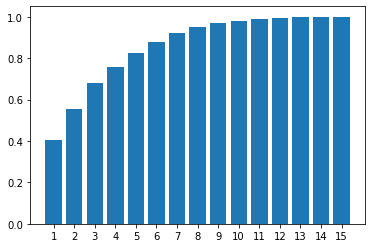

In [13]:
plt.bar([ f"{i+1}" for i in range(15)], np.cumsum(cls.explained_variance_ratio_))

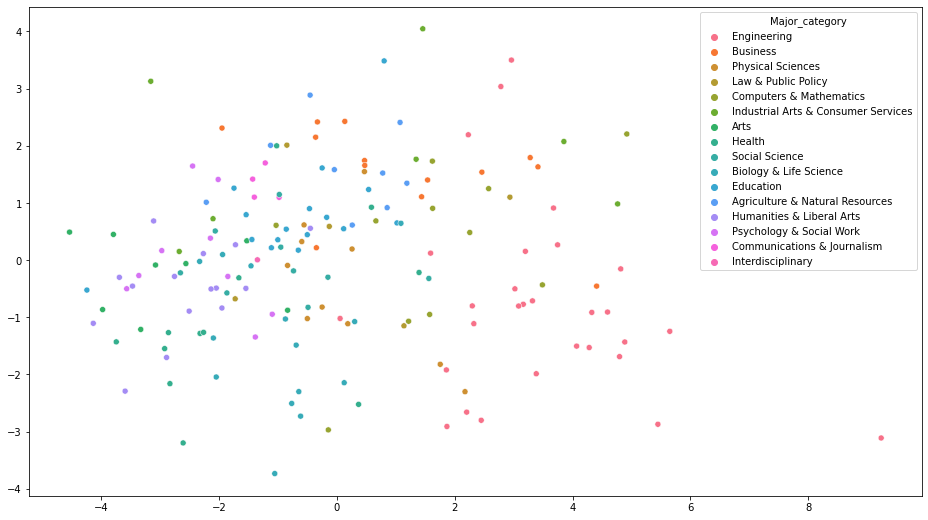

In [14]:
plt.figure(figsize=(16,9))
sns.scatterplot(x=pcs[:, 0], y=pcs[:, 1], hue=df.dropna().Major_category)
plt.show()